#Introduction

The "Bank Marketing" dataset is a comprehensive collection of data related to a Portuguese banking institution's direct marketing campaigns. The dataset contains 45,211 instances, representing potential customers who were contacted by the bank to subscribe to a term deposit. This dataset provides a unique opportunity to explore the effectiveness of various marketing strategies and identify key factors influencing customer decisions.

#Background

The dataset is based on a real-world marketing campaign conducted by a Portuguese bank between 2008 and 2010. The campaign aimed to persuade customers to subscribe to a term deposit, a type of savings account with a fixed interest rate and maturity period.

#Primary Goals

1. Predict Deposit Subscription: Develop a model to predict the likelihood of a customer subscribing to a term deposit.
2. Identify Key Influencers: Determine the most important factors influencing deposit subscription decisions.

#Dataset Characteristics

- Total Instances: 45,211
- Attribute Count: 17 (16 features, 1 target variable)
- Feature Types: Mixed (categorical, numerical)
- Target Variable: Deposit Subscription (binary, yes/no)


###Attributes
   #### Bank client data:

   1 - **age** (numeric)

   2 - **job** : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services")

   3 - **marital** : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

   4 - **education** (categorical: "unknown","secondary","primary","tertiary")

   5 - **default**: has credit in default? (binary: "yes","no")

   6 - **balance**: average yearly balance, in euros (numeric)

   7 - **housing**: has housing loan? (binary: "yes","no")

   8 - **loan**: has personal loan? (binary: "yes","no")

   #### Related with the last contact of the current campaign:

   9 - **contact**: contact communication type (categorical: "unknown","telephone","cellular")

  10 - **day**: last contact day of the month (numeric)

  11 - **month**: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

  12 - **duration**: last contact duration, in seconds (numeric)

   ####  Other attributes:
  13 - **campaign**: number of contacts performed during this campaign and for this client (numeric, includes last contact)

  14 - **pdays**: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

  15 - **previous**: number of contacts performed before this campaign and for this client (numeric)

  16 - **poutcome**: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")


  Output variable (desired target):
  
  17 - **y** - has the client subscribed a term deposit? (binary: "yes","no")

#Import Necessary Libraries

Importing the necessary libraries for data analysis. These libraries include pandas, numpy, matplotlib and seaborn which are commonly used for data manipulation, analysis and visualization

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load The Dataset

This indicates that we are loading the **"Bank Marketing"** dataset into our program. The dataset will be stored in a pandas DataFrame called **"bank_data"**.

In [ ]:
#Defining file path
file_path='//content//bank-full - bank-full.csv'

# Read the csv file and save it into "bank_data" variable
bank_data = pd.read_csv(file_path)

# Initial Information About The Dataset
I am going to display initial information of the dataset to get a glimpse of the data's structure and values.

-Displaying the first few rows of the dataset to get a glimpse of the data.

-Checking the shape of the dataset (number of rows and columns).

-Exploring the column names and data types.

-Descriptive Statistics includes:

   1.Numeric Variables.

   2.Categorical Variables.



In [ ]:
# Displaying first 5 rows
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
#Shape of the dataset
bank_data.shape

(45211, 17)

In [ ]:
#Getting basic information about the dataset
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


No null values found

In [ ]:
# Descriptive Statistics of all attributes
bank_data.describe(include='all').T.round(2)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,45211.0,NaN,NaN,NaN,40.93621,10.618762,18.0,33.0,39.0,48.0,95.0
job,45211,12,blue-collar,9732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,45211,3,married,27214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,45211,4,secondary,23202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,45211,2,no,44396,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,45211.0,NaN,NaN,NaN,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211,2,yes,25130,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,45211,2,no,37967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,45211,3,cellular,29285,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,45211.0,NaN,NaN,NaN,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0


Numerical Columns:

1. count: Number of non-missing values
2. mean: Average value
3. std: Standard deviation
4. min: Minimum value
5. 25%: First quartile (Q1)
6. 50%: Median (second quartile, Q2)
7. 75%: Third quartile (Q3)
8. max: Maximum value

Categorical Columns:

1. count: Number of non-missing values
2. unique: Number of unique categories
3. top: Most frequent category
4. freq: Frequency of the most frequent category



# Data Exploration(EDA)

Exploratory Data Analysis (EDA), is an essential step in the machine learning. It involves **examining** and **visualizing the characteristics of a dataset to gain insights**, **understand patterns**, **detect anomalies**, and **prepare the data for further analysis** and **modeling**. some common techniques used in data exploration:
- Data Visualization
- Data Cleaning
- Data Preprocessing

##Data Visualization

In [ ]:
#Creating function for numerical analysis
def plot_hist(column):
  plt.figure(figsize=(8,4))
  sns.histplot(data=bank_data,x=column,kde=True)
  plt.show()


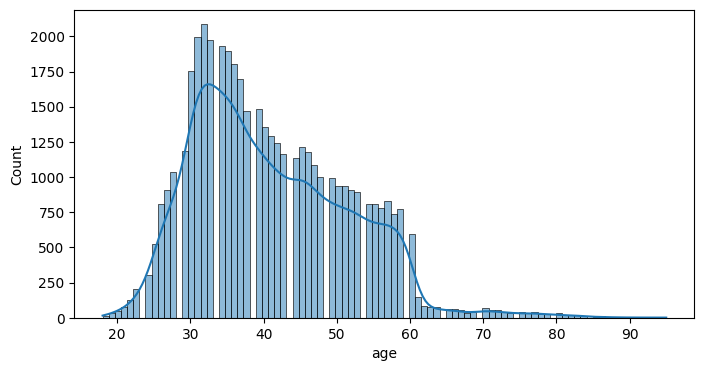

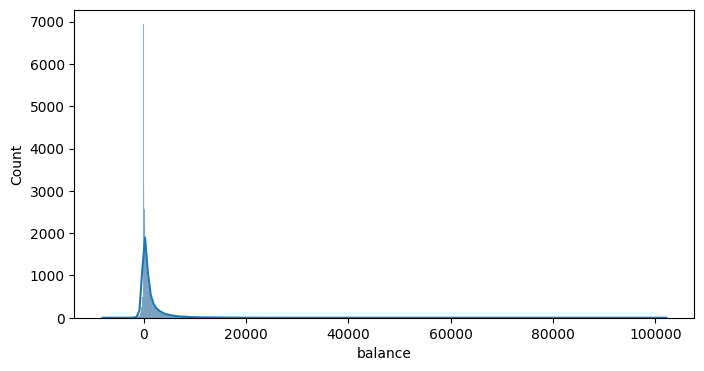

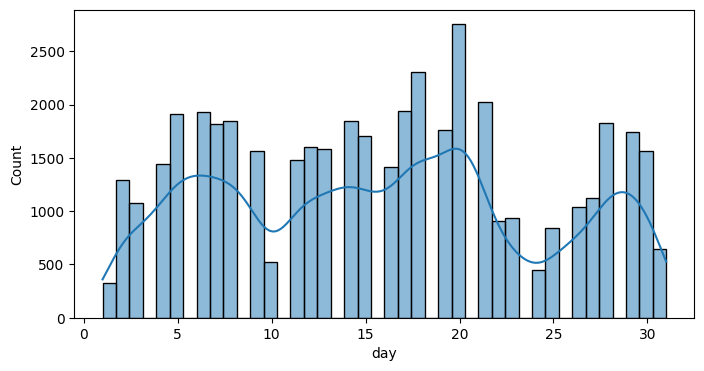

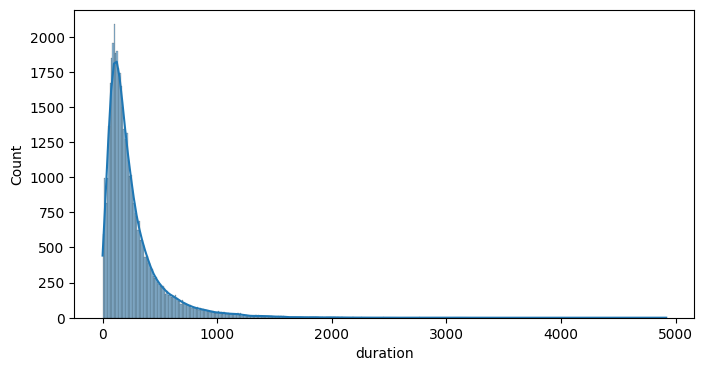

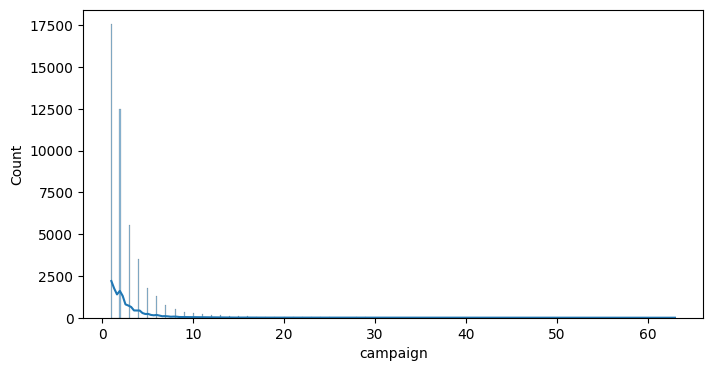

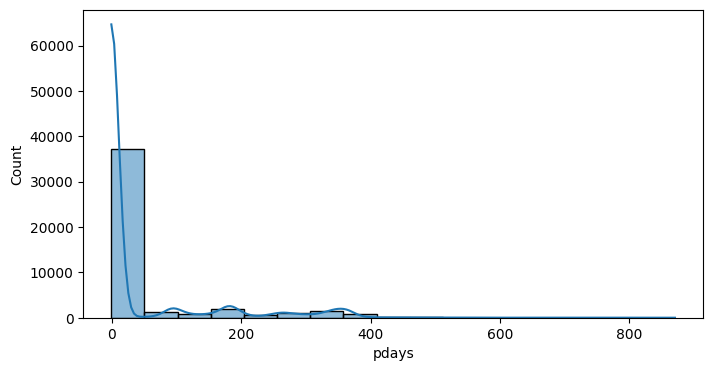

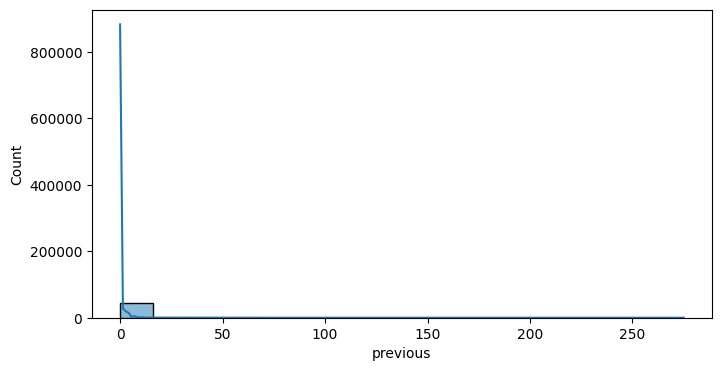

In [ ]:
#plotting histogram for each numerical columns
plot_hist('age')
plot_hist('balance')
plot_hist('day')
plot_hist('duration')
plot_hist('campaign')
plot_hist('pdays')
plot_hist('previous')

In [ ]:
job_cat=bank_data.job.value_counts()

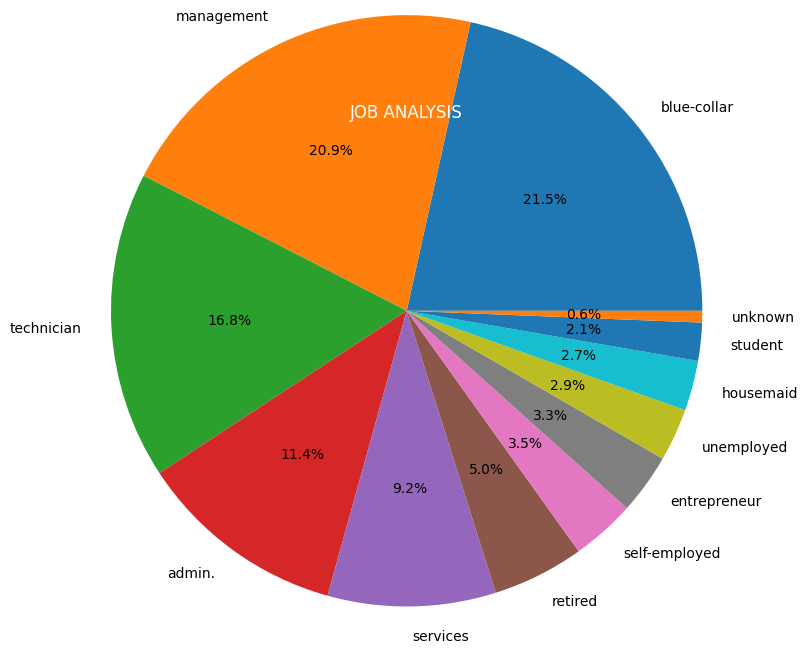

In [ ]:
plt.pie(job_cat,labels=job_cat.index,autopct="%1.1f%%",radius=2)
plt.title('JOB ANALYSIS',color='w')
plt.show()

<ipython-input-26-ba654f9572aa>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(bank_data.marital,palette='flare')


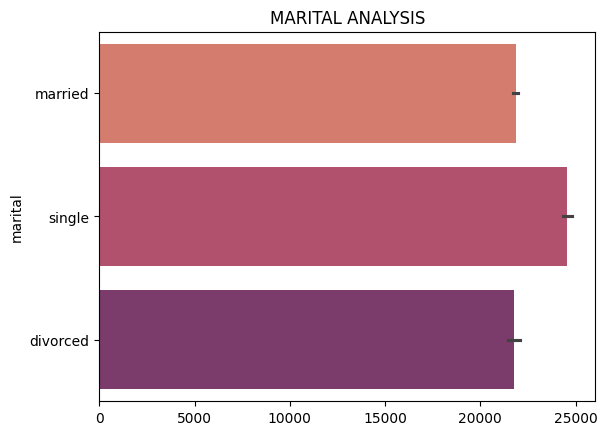

In [ ]:
sns.barplot(bank_data.marital,palette='flare')
plt.title('MARITAL ANALYSIS')
plt.show()

<ipython-input-27-55b100e3f0e5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(bank_data.education,palette='flare')


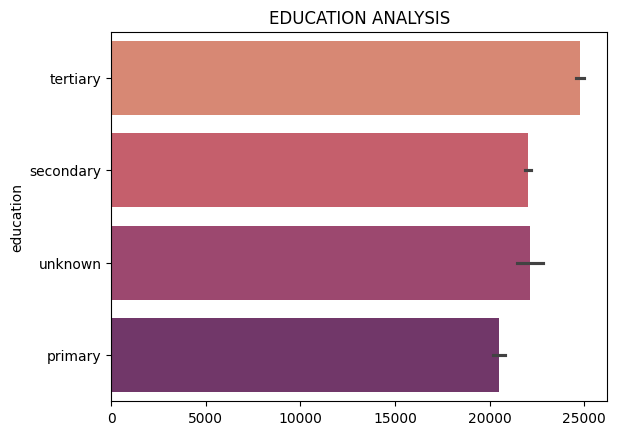

In [ ]:
sns.barplot(bank_data.education,palette='flare')
plt.title('EDUCATION ANALYSIS')
plt.show()

<ipython-input-35-924e69a50373>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(bank_data.month,palette='flare')


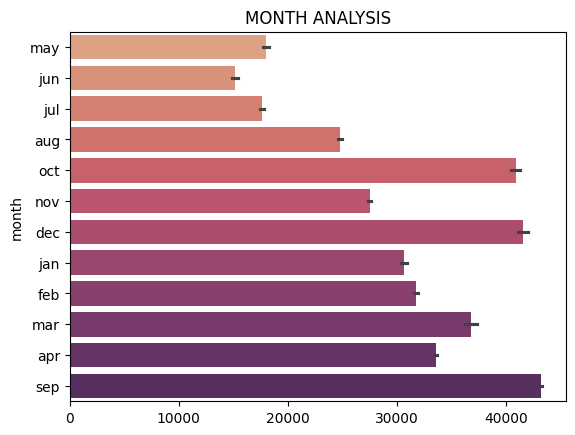

In [ ]:
sns.barplot(bank_data.month,palette='flare')
plt.title('MONTH ANALYSIS')
plt.show()

<ipython-input-36-7b6859cade24>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(bank_data.poutcome,palette='flare')


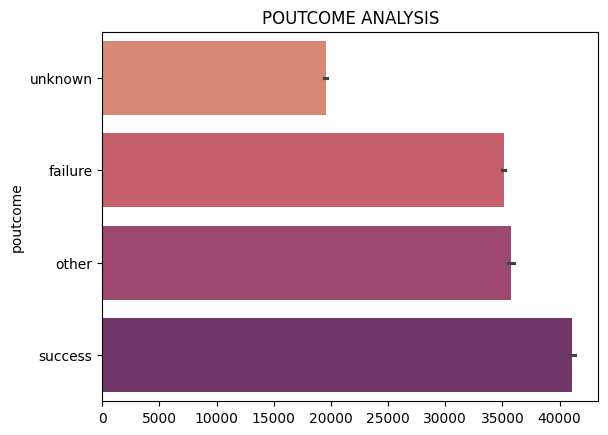

In [ ]:
sns.barplot(bank_data.poutcome,palette='flare')
plt.title('POUTCOME ANALYSIS')
plt.show()

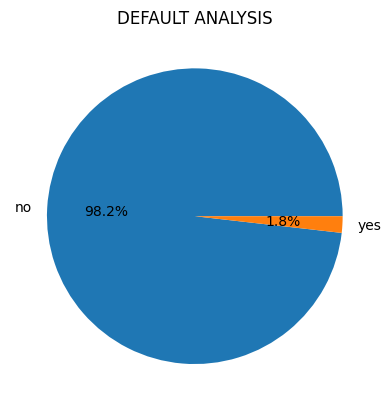

In [ ]:
plt.pie(bank_data.default.value_counts(),labels=bank_data.default.value_counts().index,autopct="%1.1f%%")
plt.title('DEFAULT ANALYSIS')
plt.show()

In [ ]:
plt.pie(bank_data.housing.value_counts(),labels=bank_data.housing.value_counts().index,autopct="%1.1f%%")
plt.title('HOUSING LOAN ANALYSIS')
plt.show()

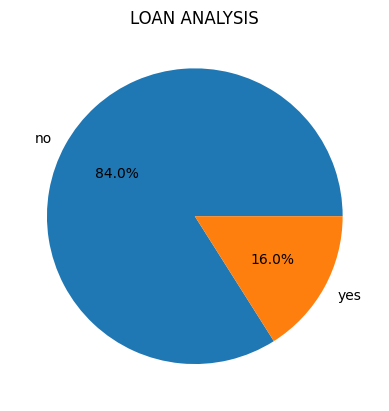

In [ ]:
plt.pie(bank_data.loan.value_counts(),labels=bank_data.loan.value_counts().index,autopct="%1.1f%%")
plt.title('LOAN ANALYSIS')
plt.show()

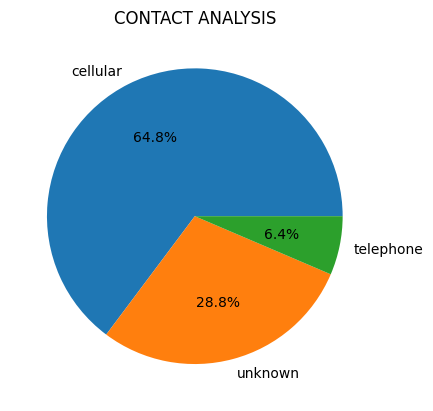

In [ ]:
plt.pie(bank_data.contact.value_counts(),labels=bank_data.contact.value_counts().index,autopct="%1.1f%%")
plt.title('CONTACT ANALYSIS')
plt.show()

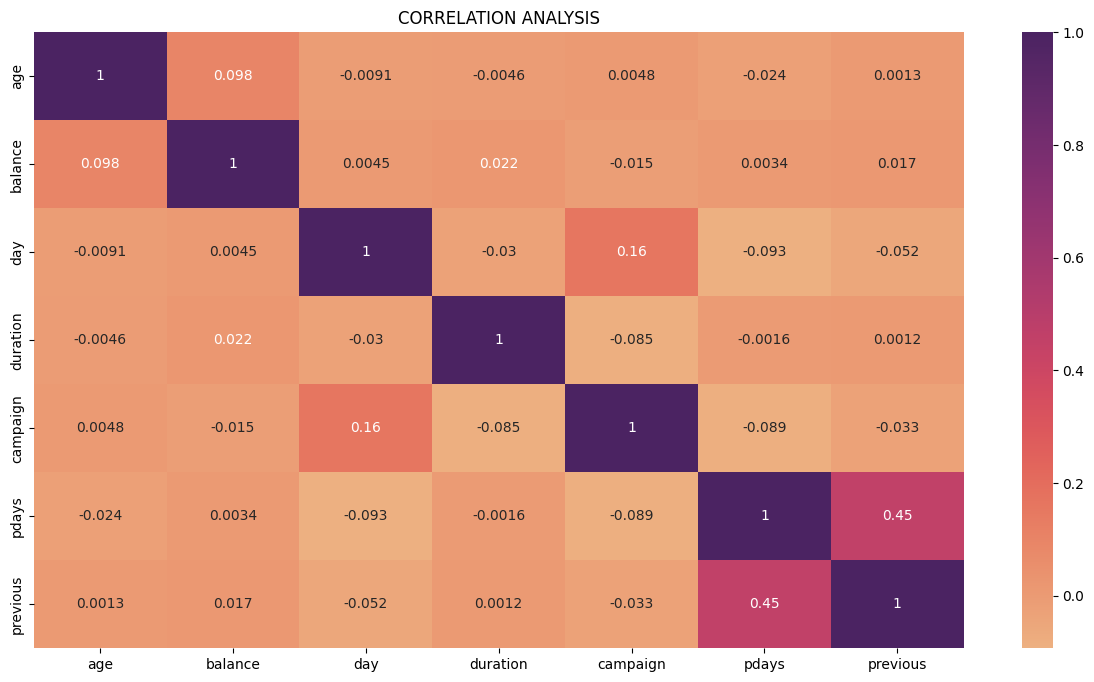

In [ ]:
corr_data= bank_data.corr(numeric_only=True)
plt.figure(figsize=(15,8))
sns.heatmap(corr_data,annot=True,cmap='flare') # annot : write the data value in each cell
plt.title('CORRELATION ANALYSIS')
plt.show()

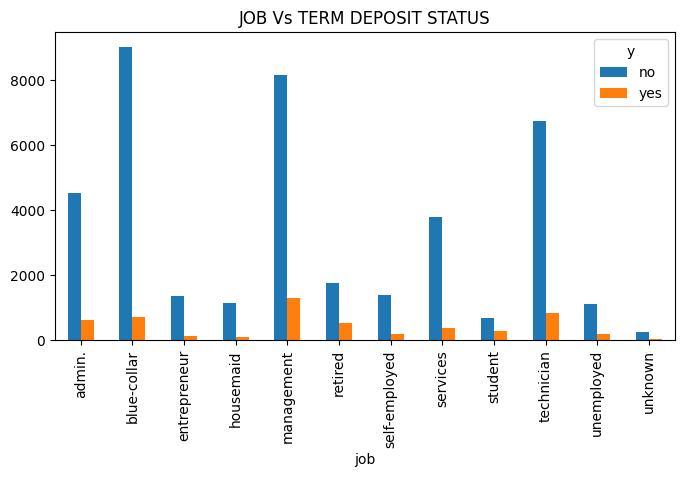

In [ ]:
pd.crosstab(bank_data.job,bank_data.y).plot(kind='bar',figsize=(8,4))

plt.title('JOB Vs TERM DEPOSIT STATUS')
plt.show()

Around 20% of managers were subscribed term deposit.

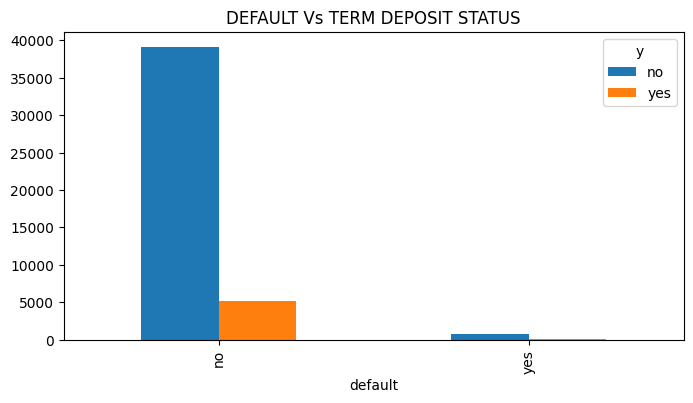

In [ ]:
pd.crosstab(bank_data.default,bank_data.y).plot(kind='bar',figsize=(8,4))

plt.title('DEFAULT Vs TERM DEPOSIT STATUS')
plt.show()

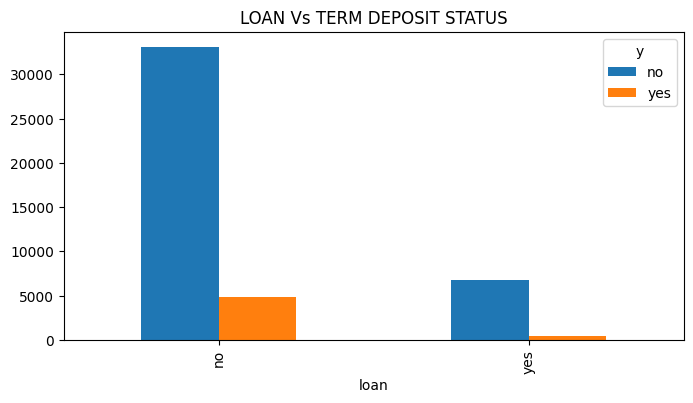

In [ ]:
pd.crosstab(bank_data.loan,bank_data.y).plot(kind='bar',figsize=(8,4))

plt.title('LOAN Vs TERM DEPOSIT STATUS')
plt.show()

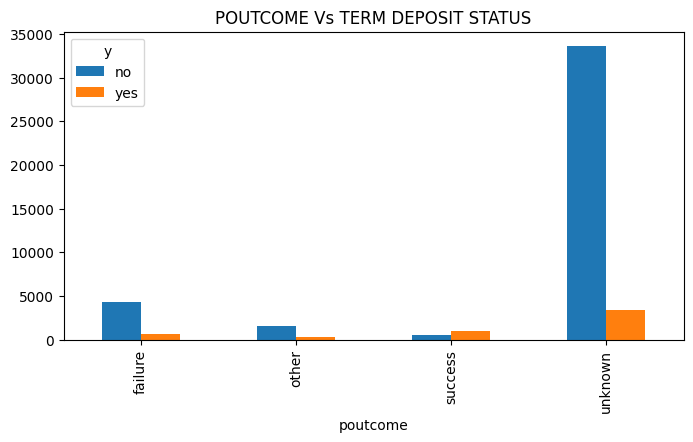

In [ ]:
pd.crosstab(bank_data.poutcome,bank_data.y).plot(kind='bar',figsize=(8,4))

plt.title('POUTCOME Vs TERM DEPOSIT STATUS')
plt.show()

## Data Cleaning & Outliers Handling

In [ ]:
#checking for duplicates
bank_data.duplicated().sum()

0

No duplictes found

#### Showing outliers

In [ ]:
num_col=bank_data.get(['age','balance','duration','campaign','pdays','previous'])

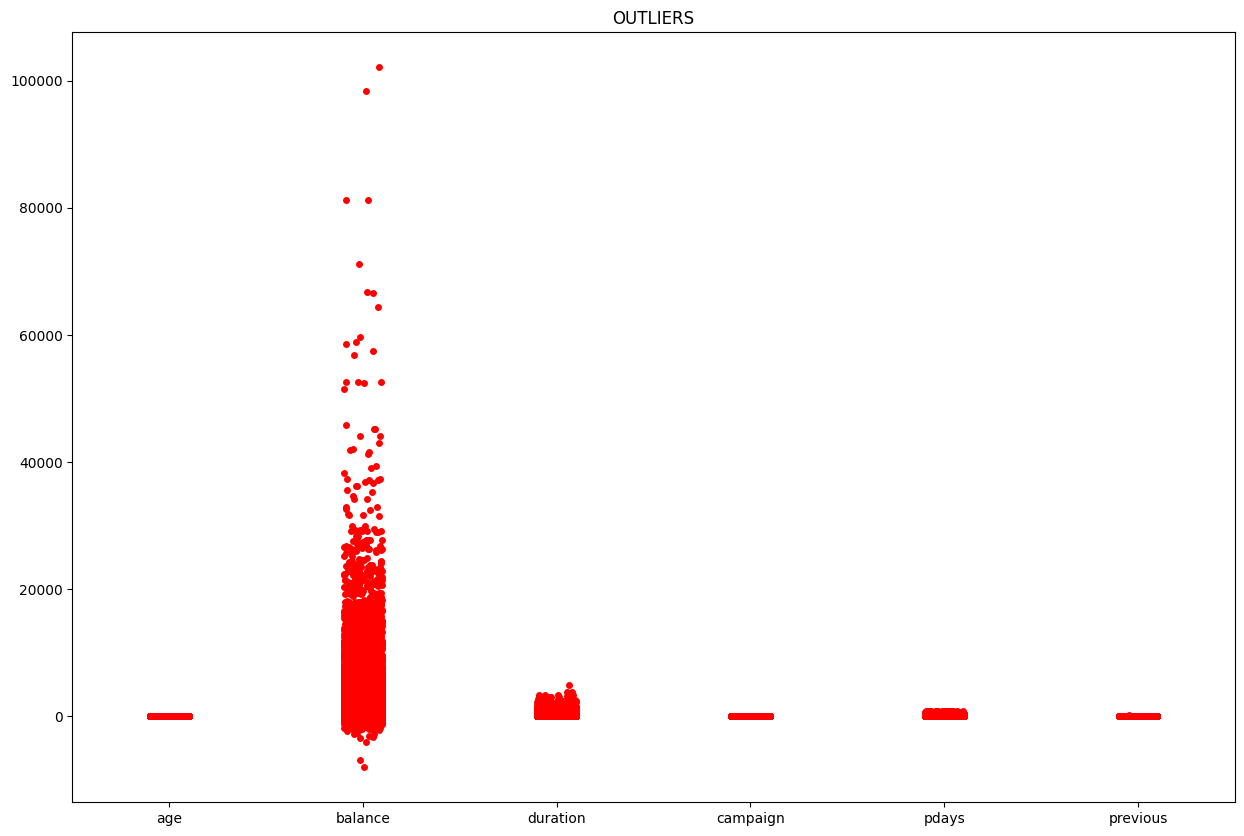

In [ ]:
plt.figure(figsize=(15,10))

sns.stripplot(num_col,color='red',size=5)
plt.title('OUTLIERS')
plt.show()

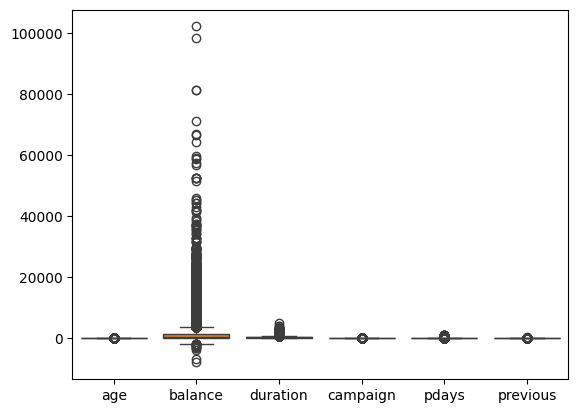

In [ ]:
sns.boxplot(num_col)
plt.show()

2 visuals were generated for outliers showing, stripplot and box plot.we can see that, lots of outliers were there.

In [ ]:
# we are going to handle these outliers by IQR method with replacing outliers by upper limit and lower limit.
def iqr_cap(columns):
    for col in columns:
        q1 = num_col[col].quantile(0.25)
        q3 = num_col[col].quantile(0.75)
        iqr = q3 - q1
        upper_limit = q3 + (1.5 * iqr)
        lower_limit = q1 - (1.5 * iqr)
        print(f"Column: {col}")
        print(f"Upper limit: {upper_limit}, Lower limit: {lower_limit}")
        print()
        bank_data[col] = bank_data[col].apply(lambda x: lower_limit if x < lower_limit else
                                   upper_limit if x > upper_limit else x)


In [ ]:
iqr_cap(num_col.columns)

Column: age
Upper limit: 70.5, Lower limit: 10.5

Column: balance
Upper limit: 3462.0, Lower limit: -1962.0

Column: duration
Upper limit: 643.0, Lower limit: -221.0

Column: campaign
Upper limit: 6.0, Lower limit: -2.0

Column: pdays
Upper limit: -1.0, Lower limit: -1.0

Column: previous
Upper limit: 0.0, Lower limit: 0.0



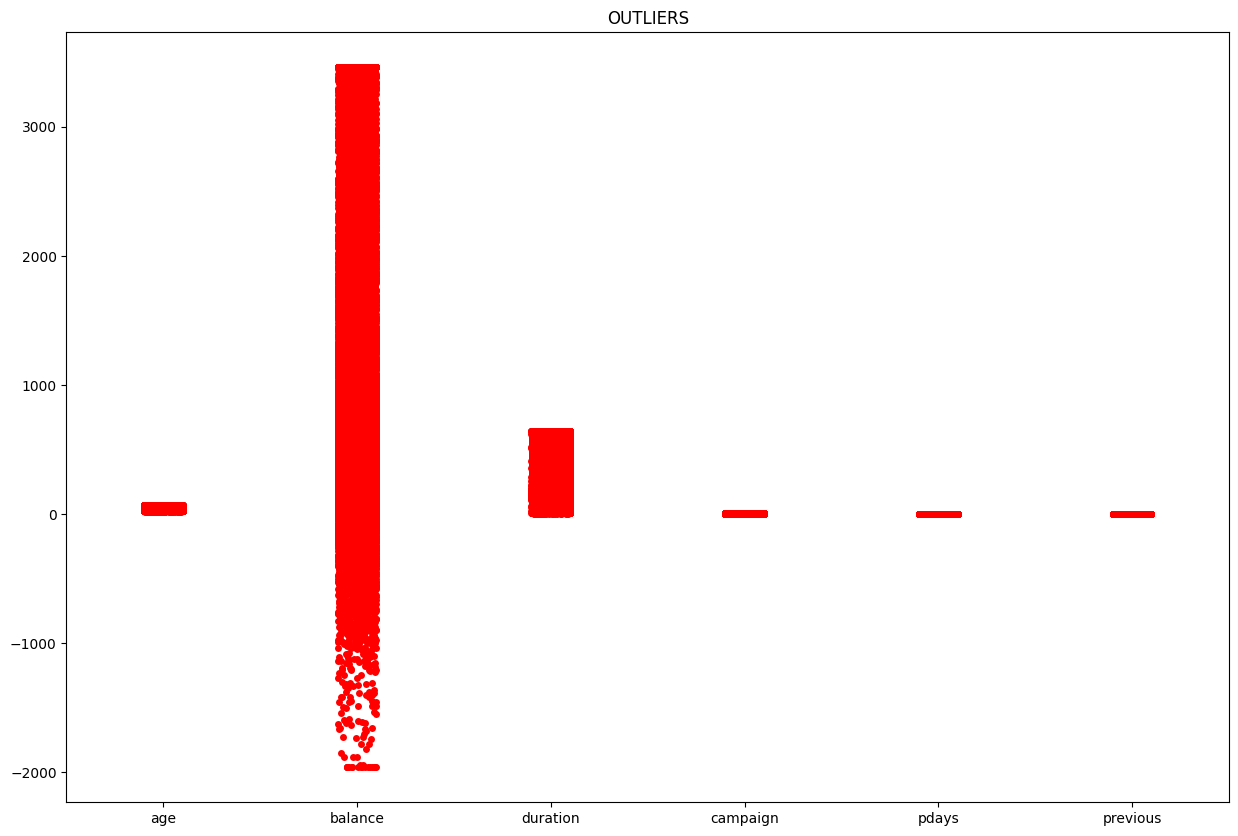

In [ ]:
plt.figure(figsize=(15,10))
sns.stripplot(num_col,color='red',size=5)
plt.title('OUTLIERS')
plt.show()

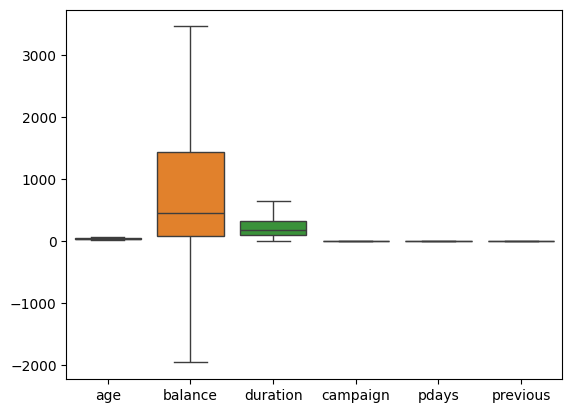

In [ ]:
sns.boxplot(num_col)
plt.show()

Here most of the outliers are treated.

In [ ]:
#Checking Skewness
skewness = num_col.skew()
print("Skewness:\n", skewness)

Skewness:
 age         0.529715
balance     1.097802
duration    1.037574
campaign    1.099115
pdays       0.000000
previous    0.000000
dtype: float64


In [ ]:
#Checking kurtosis
kurtosis=num_col.kurtosis()
print("kurtosis:\n", kurtosis)

kurtosis:
 age        -0.375981
balance     0.007675
duration    0.107564
campaign    0.070302
pdays       0.000000
previous    0.000000
dtype: float64


I think both skewness and kurtosis are not much problematic here.so I moved on.

<Figure size 1500x800 with 0 Axes>

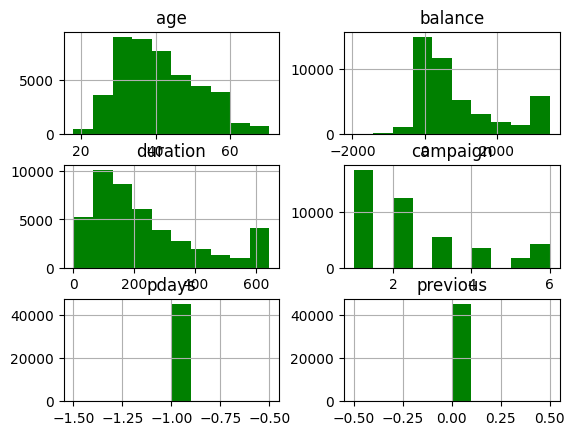

In [ ]:
plt.figure(figsize=(15,8))
num_col.hist(color='green')

plt.show()

# Encoding Categorical Variables

In [ ]:
#Showing categorical variables
obj_col = bank_data.select_dtypes(include=['object']).columns
obj_col

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder ,LabelEncoder

In [ ]:
#Onehot Encoding for nominal categorical variables
nom_col = ['job','marital','education','default','housing','loan','contact','poutcome']
ord_col = ['month']

In [ ]:
ohe=OneHotEncoder
bank_data = pd.get_dummies(bank_data,columns=nom_col)

In [ ]:
#drop unwanted features
bank_data = bank_data.drop(['job_unknown',
                            'education_unknown',
                            'default_yes',
                            'housing_no',
                            'loan_yes',
                            'contact_unknown',
                            'poutcome_unknown'],axis = 1)

In [ ]:
# Rename existing column
new_col = {'default_no':'default',
            'housing_yes':'housing',
            'loan_no':'loan'}

In [ ]:
# Assigning new column names
bank_data.rename(columns=new_col,inplace=True)

In [ ]:
oe = OrdinalEncoder()
bank_data[ord_col]=oe.fit_transform(bank_data[ord_col])

In [ ]:
le = LabelEncoder()
bank_data['y']=le.fit_transform(bank_data['y'])

In [ ]:
bank_data.shape

(45211, 34)

#Feature Selection

Recursive Feature Elimination (RFE)


Create a logistic regression model (for classification).
Use RFE to iteratively remove features based on their importance.

In [ ]:
import warnings # For warning handling
# For warning handling
warnings.filterwarnings('ignore') # For ignoring warnings

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

x = bank_data.drop('y',axis=1)
y = bank_data['y']

logisticregression = LogisticRegression()

rfe = RFE(estimator=logisticregression,n_features_to_select=20)
rfe.fit(x,y)

selected_features = x.columns[rfe.support_]


In [ ]:
print('Selected Featurees are :\n', selected_features)

Selected Featurees are :
 Index(['campaign', 'pdays', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_retired', 'job_student', 'marital_divorced',
       'marital_married', 'marital_single', 'education_primary',
       'education_tertiary', 'default', 'housing', 'loan', 'contact_cellular',
       'contact_telephone', 'poutcome_failure', 'poutcome_other',
       'poutcome_success'],
      dtype='object')


In [ ]:
X = bank_data[selected_features]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   campaign            45211 non-null  float64
 1   pdays               45211 non-null  float64
 2   job_blue-collar     45211 non-null  bool   
 3   job_entrepreneur    45211 non-null  bool   
 4   job_housemaid       45211 non-null  bool   
 5   job_retired         45211 non-null  bool   
 6   job_student         45211 non-null  bool   
 7   marital_divorced    45211 non-null  bool   
 8   marital_married     45211 non-null  bool   
 9   marital_single      45211 non-null  bool   
 10  education_primary   45211 non-null  bool   
 11  education_tertiary  45211 non-null  bool   
 12  default             45211 non-null  bool   
 13  housing             45211 non-null  bool   
 14  loan                45211 non-null  bool   
 15  contact_cellular    45211 non-null  bool   
 16  cont

#Splitting

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
# Print the shapes of the training and testing sets to verify the splitting
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", y_train.shape)
print("Shape of Y_test:", y_test.shape)

Shape of X_train: (36168, 20)
Shape of X_test: (9043, 20)
Shape of Y_train: (36168,)
Shape of Y_test: (9043,)


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)

#Modelling

In [ ]:
#importing models
from sklearn.linear_model import LogisticRegression,RidgeClassifierCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
models = {'logisticregression':LogisticRegression(),
          'ridge classifier cv':RidgeClassifierCV(),
          'decision tree classifier':DecisionTreeClassifier(),
          'random forest classifier': RandomForestClassifier(),
          'gradient boosting classifier':GradientBoostingClassifier(),
          'support vector machine':SVC(),
          'kneighbors classifier':KNeighborsClassifier(),
          'gaussianNB':GaussianNB(),
          'bernoulliNB':BernoulliNB(),
          'xgb':XGBClassifier()}

In [ ]:
for name, model in models.items():
  model.fit(X_train_scaled,y_train)
  y_pred = model.predict(X_test)
  print(f"Model:{name}")
  score_list_train=[]
  score_list_test=[]
  score_list_train.append(model.score(X_train_scaled,y_train))
  score_list_test.append(model.score(X_test,y_test))
  Accuracy_Train = max(score_list_train) # Find the maximum accuracy for both training and testing
  Accuracy_Test = max(score_list_test)
  print(f" best accuracy (Training): {Accuracy_Train*100:.2f}%")
  print(f" best accuracy (Testing): {Accuracy_Test*100:.2f}%")
  print()
  print(f"Accuracy:{accuracy_score(y_test,y_pred)*100:.2f}%")
  print(f"Classification Report:")
  print(classification_report(y_test,y_pred))
  print('Confusion Matrix:')
  print(confusion_matrix(y_test,y_pred))
  print()



Model:logisticregression
 best accuracy (Training): 89.35%
 best accuracy (Testing): 87.94%

Accuracy:87.94%
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7952
           1       0.00      0.00      0.00      1091

    accuracy                           0.88      9043
   macro avg       0.44      0.50      0.47      9043
weighted avg       0.77      0.88      0.82      9043

Confusion Matrix:
[[7952    0]
 [1091    0]]

Model:ridge classifier cv
 best accuracy (Training): 89.34%
 best accuracy (Testing): 87.94%

Accuracy:87.94%
Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      7952
           1       0.00      0.00      0.00      1091

    accuracy                           0.88      9043
   macro avg       0.44      0.50      0.47      9043
weighted avg       0.77      0.88      0.82      9043

Confusion Matrix:
[[7952    0]
 [10

The best model in accuracy is model : **BernoulliNB** with accuracy **89%**.

#Hyperparameter Tuning

In [ ]:
models1 = {'logisticregression':LogisticRegression(),
          'decision tree classifier':DecisionTreeClassifier(),
          'random forest classifier': RandomForestClassifier(),
          'gradient boosting classifier':GradientBoostingClassifier()}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

# Define hyperparameter tuning spaces
param_grids = {
    'logisticregression': {
        'C': [0.1, 1, 10],
        'penalty': ['l1', 'l2'],
        'max_iter': [500, 1000, 2000]
    },
    'decision tree classifier': {
        'max_depth': [3, 5, 10],
        'min_samples_split': [2, 5, 10]
    },
    'random forest classifier': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 10]
    },
    'gradient boosting classifier': {
        'learning_rate': [0.1, 0.5, 1],
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 10]
    }
}


In [ ]:
# Perform hyperparameter tuning
for name, model in models1.items():
    print(f"Tuning {name}...")

    # Grid Search
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)

    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"Best Score: {grid_search.best_score_}")

    # Random Search
    random_search = RandomizedSearchCV(model, param_grids[name], cv=5, scoring='accuracy', n_iter=10)
    random_search.fit(X_train_scaled, y_train)

    print(f"Best Parameters: {random_search.best_params_}")
    print(f"Best Score: {random_search.best_score_}")



Tuning logisticregression...
Best Parameters: {'C': 0.1, 'max_iter': 500, 'penalty': 'l2'}
Best Score: 0.8934692622564665
Best Parameters: {'penalty': 'l2', 'max_iter': 2000, 'C': 10}
Best Score: 0.8934692622564665

Tuning decision tree classifier...
Best Parameters: {'max_depth': 3, 'min_samples_split': 2}
Best Score: 0.8936904706070818
Best Parameters: {'min_samples_split': 2, 'max_depth': 3}
Best Score: 0.8936904706070818

Tuning random forest classifier...
Best Parameters: {'max_depth': 10, 'n_estimators': 50}
Best Score: 0.8940498883083597
Best Parameters: {'n_estimators': 100, 'max_depth': 10}
Best Score: 0.8937734275609351

Tuning gradient boosting classifier...
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Best Score: 0.8939116445563432
Best Parameters: {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1}
Best Score: 0.8939116445563432



Random Forest Classifier is the best among other models for this dataset with

Best Parameters: {'max_depth': 10, 'n_estimators': 50} and

Best Score: 0.8940498883083597

**Analysis**

The analysis includes the following steps:

1. Data exploration and preprocessing
2. Feature selection and engineering
3. Model evaluation and selection
4. Hyperparameter tuning

**Results**

The random forest classifier achieved an accuracy of 89.4% on the testing set.

Hyperparameter tuning using grid search and random search further improved the model's performance.

**Conclusion**

This analysis demonstrates the effectiveness of machine learning models in predicting customer behavior. The random forest classifier's high accuracy suggests that it can be a valuable tool for banks seeking to improve their marketing campaigns.
